<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/ECDF_of_delta_ETo_Jun_Jul_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

fatal: destination path 'CIMIS' already exists and is not an empty directory.


In [3]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata
!pip install cartopy
import cartopy
import geopandas as gpd
!pip install refet
import math
import refet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for refet: filename=refet-0.4.2-py3-none-any.whl size=19274 sha256=1ad1148544968cb5f88955b41dc90576fa6dc1b233a864489a7996429604680f
  Stored in directory: /root/.cache/pip/wheels/ab/55/da/7ed6e47f6fa1135fcdef373db6f974fd7515ee8e86c9662e88
Successfully built refet


In [4]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.distributions.empirical_distribution import ECDF

# station_ids = [2]

# for id in station_ids:
#   dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
#   file = f'station_id{id}_cimis_daily_corr.csv'
#   df = pd.read_csv(f'{dir}{file}')
#   df['Date'] = pd.to_datetime(df.Date)
#   df.set_index(pd.to_datetime(df.Date),inplace=True)

#   df = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8) & (df['Date'].dt.year >= 2014)]

#   months = [6,7,8]
#   names = ['June','July','August']
#   for month in months:
#     df_mon = df[(df['Date'].dt.month == month)]
#     df_mon = df_mon.dropna()
#     ecdf = ECDF(df_mon['d_ETo'])
#     print(df_mon['d_ETo'].max())
#  #   plt.xlim(-0.1, 2.6)
# #    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])
#     plt.figure(figsize=(3,3))
#     plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
#     print(ecdf.y.max())
#     print(ecdf.x.max())
#     plt.xlabel('Delta ETo (mm)')
#     plt.ylabel('Probability')
#     plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
#     plt.grid(True)
#     plt.legend(names)
#     #plt.tight_layout()
#     # plt.savefig()



(660, 59)
(542, 59)
2.879225264521904
(661, 59)
(530, 59)
1.7502039292077107
(310, 59)
(253, 59)
1.6879192401058782


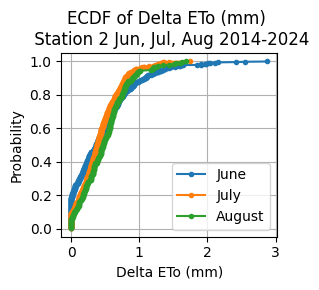

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8) & (df['Date'].dt.year >= 2014)]

  months = [6,7,8]
  names = ['June','July','August']
  plt.figure(figsize=(3,3))
  for month in months:
    df_mon = df[(df['Date'].dt.month == month)]
    print(df_mon.shape)
    df_mon = df_mon.dropna(subset=['d_ETo'])
    print(df_mon.shape)
    ecdf = ECDF(df_mon['d_ETo'])
    print(df_mon['d_ETo'].max())
#    plt.xlim(-0.1, 2.6)
#    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) \n Station {id} Jun, Jul, Aug 2014-2024')
    plt.grid(True)
    plt.legend(names)
    plt.tight_layout()
    # plt.savefig()



(960, 59)
(737, 59)
2.55389857915055
(960, 59)
(838, 59)
2.9207813873118704


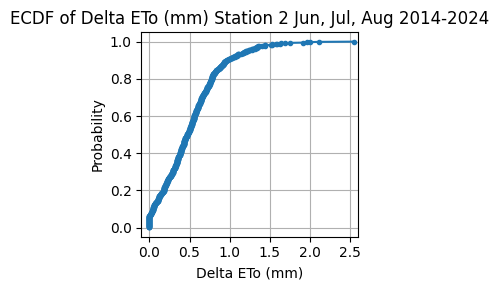

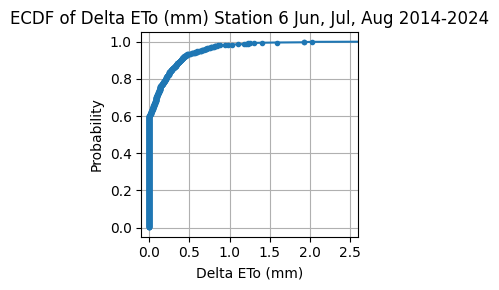

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]
station_ids=[2,6]
savefig = False
for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year >= 2014)]

  plt.figure(figsize=(3,3))

  print(df.shape)
  df = df.dropna(subset=['d_ETo'])
  print(df.shape)
  ecdf = ECDF(df['d_ETo'])
  print(df['d_ETo'].max())
  plt.xlim(-0.1, 2.6)
  plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

  plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
  plt.xlabel('Delta ETo (mm)')
  plt.ylabel('Probability')
  plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
  plt.grid(True)
#  plt.legend(names)
  plt.tight_layout()
  if savefig is True:
    plt.savefig(f'/content/CIMIS/graphs/ecdf_jja/10yr/station_{id}_10yr.png')



(92, 59)
(72, 59)
1.6879192401058782


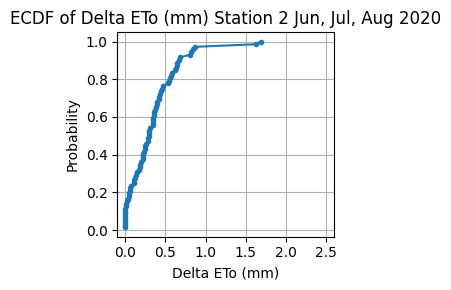

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year == 2020)]

  months = [6,7,8]
  names = ['June','July','August']
  plt.figure(figsize=(3,3))


  print(df.shape)
  df = df.dropna(subset=['d_ETo'])
  print(df.shape)
  ecdf = ECDF(df['d_ETo'])
  print(df['d_ETo'].max())
  plt.xlim(-0.1, 2.6)
  plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

  plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
  plt.xlabel('Delta ETo (mm)')
  plt.ylabel('Probability')
  plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2020')
  plt.grid(True)
#  plt.legend(names)
  plt.tight_layout()
  # plt.savefig()



(76, 59)
1.184512717726924
(78, 59)
0.9394880163132058
(84, 59)
0.821424960009213
(69, 59)
0.8593632466622259
(87, 59)
1.227167172608735
(77, 59)
0.7983019480854185
(82, 59)
2.9207813873118704
(87, 59)
1.202722665018067
(87, 59)
2.024668945069956
(79, 59)
1.2256502663904607
(32, 59)
1.9336178538054831
(75, 59)
0.4278949237635361
(79, 59)
0.6918245414616875
(84, 59)
0.8272986531485245
(47, 59)
0.8730465533428609
(48, 59)
0.693881278393147
(35, 59)
0.9658520774319256
(32, 59)
0.3546562955862256
(49, 59)
0.6078380166698727
(43, 59)
0.8742252579824248
(49, 59)
0.4848116615281412
(31, 59)
1.4433855089446626


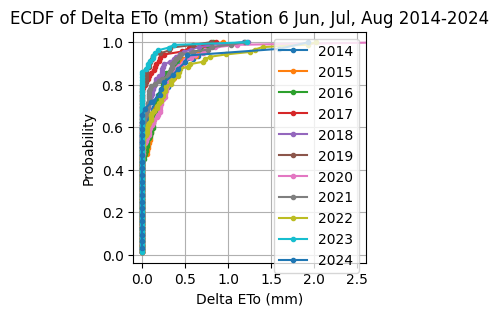

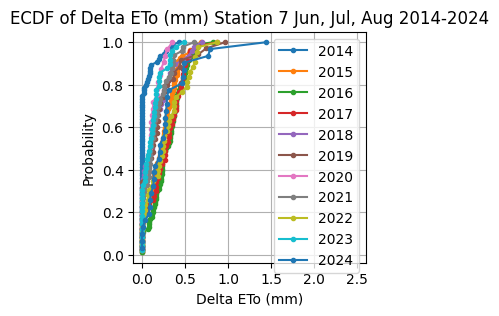

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [6,7]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year >= 2014)]

  years = list(range(2014,2025))
  plt.figure(figsize=(3,3))
  for year in years:
    df_yr = df[(df['Date'].dt.year == year)]
    df_yr = df_yr.dropna(subset=['d_ETo'])
    print(df_yr.shape)
    ecdf = ECDF(df_yr['d_ETo'])
    print(df_yr['d_ETo'].max())
    plt.xlim(-0.1, 2.6)
    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
    plt.grid(True)
    plt.legend(years)
#    plt.tight_layout()
    # plt.savefig()



This plot is for Station 2, "Five Points", and it includes the years with minimum and maximum CDF values.

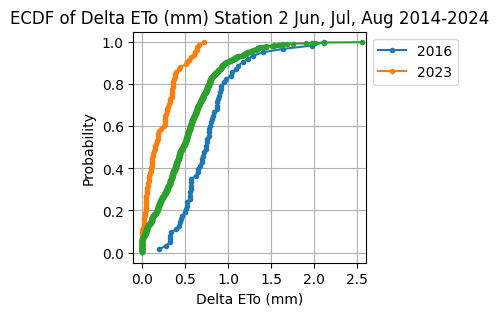

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

station_ids = [2]

for id in station_ids:
  dir = "/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/"
  file = f'station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(f'{dir}{file}')
  df['Date'] = pd.to_datetime(df.Date)
  df.set_index(pd.to_datetime(df.Date),inplace=True)

  df = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year >= 2014)]

#  years = list(range(2024,2025))
  df = df.dropna(subset=['d_ETo'])
  #print(df.shape)
  ecdf_whole = ECDF(df['d_ETo'])

  years = [2016,2023]
  plt.figure(figsize=(3,3))
  for year in years:
    df_yr = df[(df['Date'].dt.year == year)]
    df_yr = df_yr.dropna(subset=['d_ETo'])
    #print(df_yr.shape)
    ecdf = ECDF(df_yr['d_ETo'])
    #print(df_yr['d_ETo'].max())
    plt.xlim(-0.1, 2.6)
    plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5])

    plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='-')
    #plt.plot(ecdf_whole.x, ecdf_whole.y, marker='.', linestyle='-')
    plt.xlabel('Delta ETo (mm)')
    plt.ylabel('Probability')
    plt.title(f'ECDF of Delta ETo (mm) Station {id} Jun, Jul, Aug 2014-2024')
    plt.grid(True)
    plt.legend(years, bbox_to_anchor=(1, 1))
  plt.plot(ecdf_whole.x, ecdf_whole.y, marker='.', linestyle='-')
  plt.tight_layout()
#  plt.savefig()

